In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.ensemble import IsolationForest


In [7]:
from sklearn.model_selection import train_test_split


In [8]:
from sklearn.ensemble import RandomForestClassifier


In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
df=pd.read_csv("Fraudulent_E-Commerce_Transaction_Data_2.csv")


In [12]:
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


In [13]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

In [14]:
df.shape

(23634, 16)

In [15]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [17]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.560210,0.051705,178.660531,11.266015
std,282.046669,1.419663,10.009471,0.221436,107.388682,6.980659
min,10.000000,1.000000,-2.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


In [18]:
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


In [19]:
df=df.drop(['Transaction ID','Customer ID'],axis=1)


In [20]:
df

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


<Axes: xlabel='Is Fraudulent', ylabel='count'>

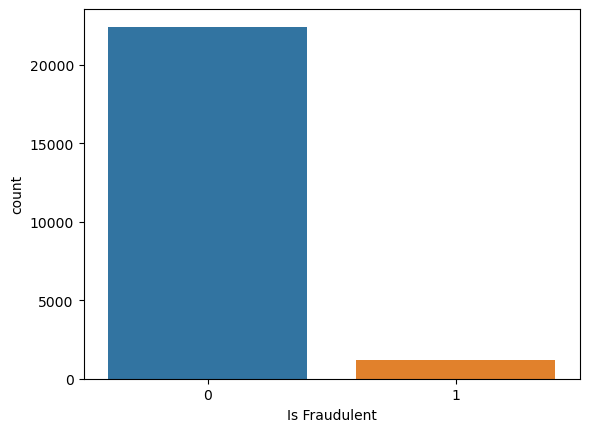

In [21]:
sns.countplot(x=df['Is Fraudulent'])

<Axes: xlabel='Payment Method', ylabel='count'>

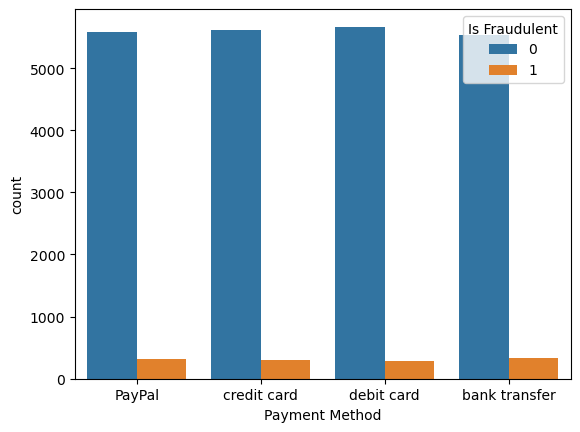

In [22]:
sns.countplot(x=df['Payment Method'],hue=df['Is Fraudulent'])

<Axes: xlabel='Product Category', ylabel='count'>

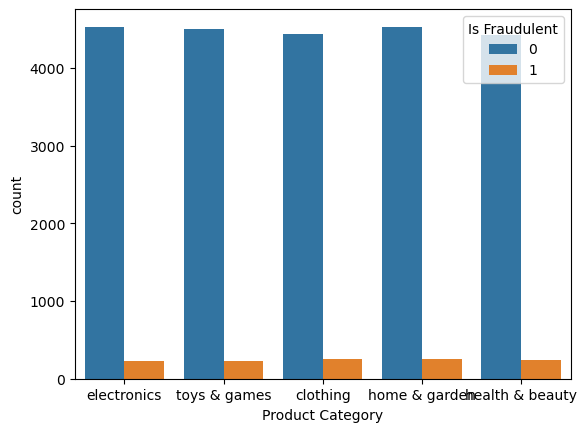

In [23]:
sns.countplot(x=df['Product Category'],hue=df['Is Fraudulent'])

<Axes: xlabel='Device Used', ylabel='count'>

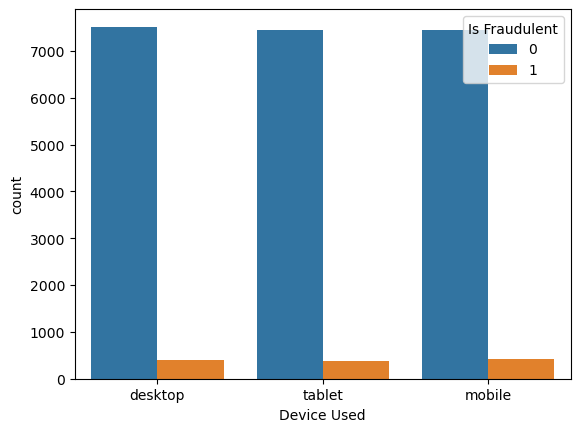

In [24]:
sns.countplot(x=df['Device Used'],hue=df['Is Fraudulent'])

In [25]:
df

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


<Axes: xlabel='Is Fraudulent', ylabel='Customer Age'>

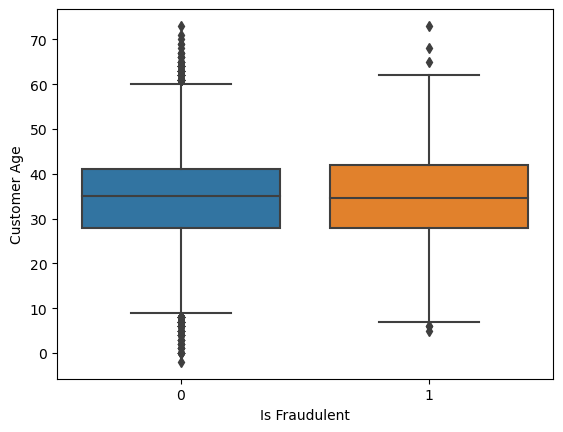

In [26]:
sns.boxplot(x=df['Is Fraudulent'],y=df['Customer Age'])

<Axes: xlabel='Is Fraudulent', ylabel='Transaction Amount'>

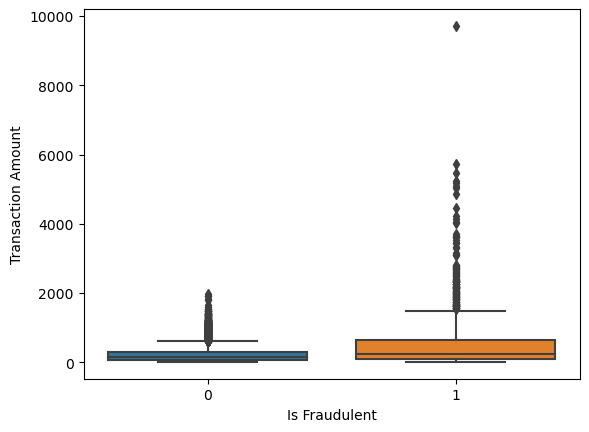

In [27]:
sns.boxplot(x=df['Is Fraudulent'],y=df['Transaction Amount'])

<Axes: xlabel='Is Fraudulent', ylabel='Account Age Days'>

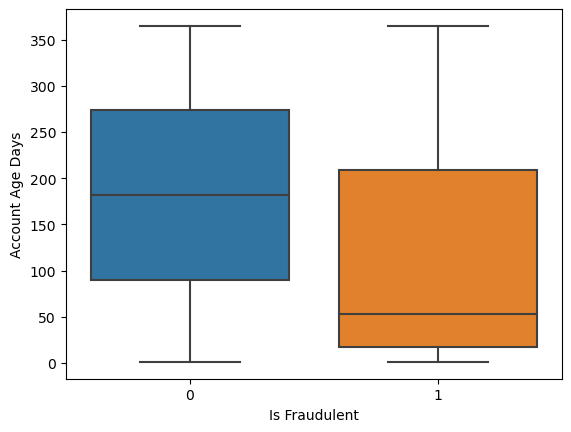

In [28]:
sns.boxplot(x=df['Is Fraudulent'],y=df['Account Age Days'])

<Axes: xlabel='Is Fraudulent', ylabel='Transaction Hour'>

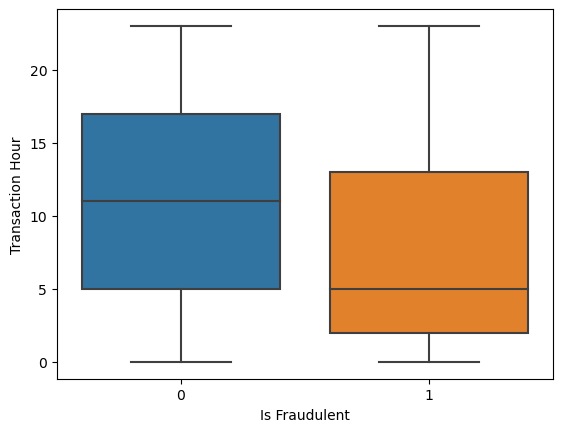

In [29]:
sns.boxplot(data=df,x=df['Is Fraudulent'],y=df['Transaction Hour'])

In [30]:
df

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


In [31]:
fraudulent_df=df.groupby("Is Fraudulent").get_group(1)


In [32]:
non_fraudulent_df=df.groupby("Is Fraudulent").get_group(0)


In [33]:
fraudulent_df

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
36,222.00,2024-03-25 19:30:56,bank transfer,home & garden,1,51,Robinton,tablet,138.3.124.205,"5531 Sharp Squares Apt. 982\nNew Rachel, GU 76203","5531 Sharp Squares Apt. 982\nNew Rachel, GU 76203",1,194,4
115,307.37,2024-01-20 19:27:38,bank transfer,home & garden,2,32,North Hollystad,desktop,223.202.233.44,"52360 Bell Crossing\nEdwinchester, MH 89729","52360 Bell Crossing\nEdwinchester, MH 89729",1,166,19
169,94.23,2024-03-11 14:30:07,bank transfer,health & beauty,4,26,Scotthaven,tablet,52.12.114.19,"17598 Vanessa Shores Suite 221\nNorth Ashley, ...","17598 Vanessa Shores Suite 221\nNorth Ashley, ...",1,27,14
204,70.93,2024-02-21 21:02:11,PayPal,home & garden,4,52,Stephenfort,tablet,172.110.189.188,"0899 Jonathan Islands\nKellermouth, CO 07405","0899 Jonathan Islands\nKellermouth, CO 07405",1,182,0
206,1465.65,2024-02-21 15:04:45,debit card,toys & games,5,58,East John,desktop,7.31.74.212,"8805 David Union Suite 461\nStaceyshire, MP 32513","8805 David Union Suite 461\nStaceyshire, MP 32513",1,141,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23527,2728.20,2024-02-18 00:12:47,credit card,health & beauty,3,28,North Bethberg,mobile,31.101.191.145,"79696 Barnes Ways Apt. 765\nLake Rubenside, IL...","79696 Barnes Ways Apt. 765\nLake Rubenside, IL...",1,3,0
23552,349.70,2024-02-28 16:52:24,bank transfer,clothing,3,11,New Lisatown,tablet,135.14.34.47,"4291 Parsons Squares Suite 424\nDrewshire, FL ...","4291 Parsons Squares Suite 424\nDrewshire, FL ...",1,10,16
23558,130.55,2024-03-01 00:41:23,debit card,health & beauty,4,48,Lisafurt,tablet,9.71.243.87,6072 Bruce Stravenue Suite 946\nLake Stephenvi...,6072 Bruce Stravenue Suite 946\nLake Stephenvi...,1,9,0
23561,99.66,2024-02-04 19:47:57,bank transfer,health & beauty,2,34,South Jim,tablet,174.152.41.179,USS Nelson\nFPO AA 20648,USS Nelson\nFPO AA 20648,1,27,19


In [34]:
label_df=fraudulent_df.groupby("Product Category")['Transaction Amount'].sum().index


In [35]:
val_df=fraudulent_df.groupby("Product Category")['Transaction Amount'].sum().values

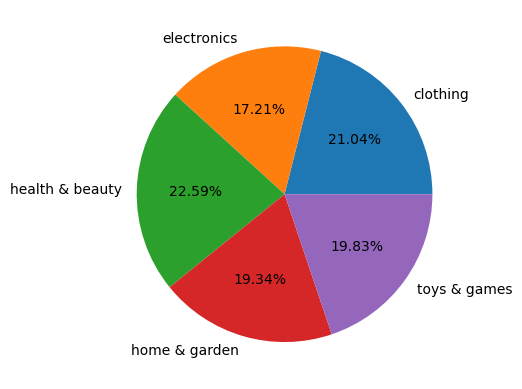

In [36]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [37]:
label_df=fraudulent_df.groupby("Payment Method")['Transaction Amount'].sum().index


In [38]:
val_df=fraudulent_df.groupby("Payment Method")['Transaction Amount'].sum().values

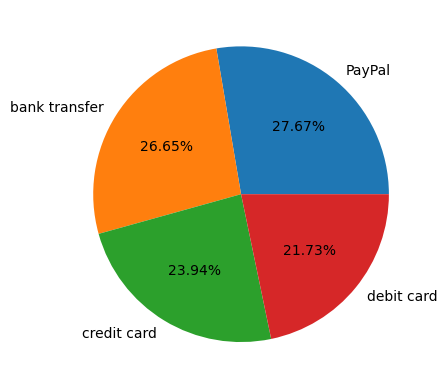

In [39]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [40]:
non_fraudulent_df

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


In [41]:
label_df=non_fraudulent_df.groupby("Product Category")['Transaction Amount'].sum().index


In [42]:
val_df=non_fraudulent_df.groupby("Product Category")['Transaction Amount'].sum().values

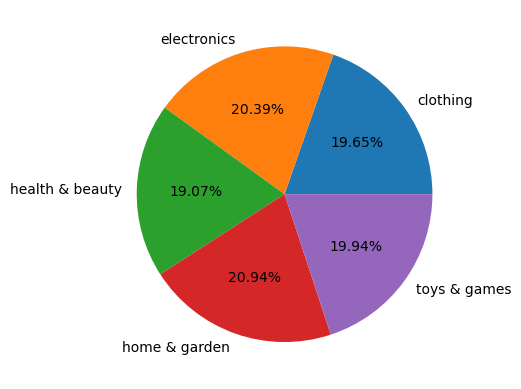

In [43]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [44]:
label_df=non_fraudulent_df.groupby("Payment Method")['Transaction Amount'].sum().index


In [45]:
val_df=non_fraudulent_df.groupby("Payment Method")['Transaction Amount'].sum().values

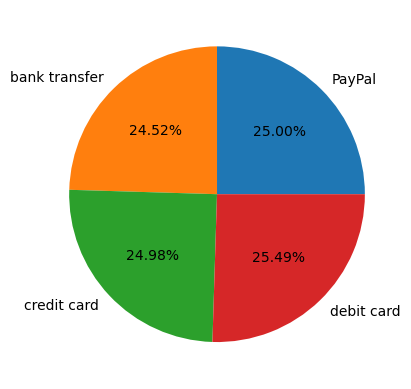

In [46]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [47]:
df

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


In [48]:
df['Transaction Date']=pd.to_datetime(df['Transaction Date'])


In [49]:
df

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


In [50]:
df['Transaction Month']=df['Transaction Date'].dt.month

In [51]:
df['Transaction Year']=df['Transaction Date'].dt.year

In [52]:
df['Transaction Day']=df['Transaction Date'].dt.day

In [53]:
df['Transaction Day_of_Week']=df['Transaction Date'].dt.day_of_week

In [54]:
df

,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Month,Transaction Year,Transaction Day,Transaction Day_of_Week
0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23,3,2024,24,6
1,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0,1,2024,22,0
2,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8,1,2024,22,0
3,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20,1,2024,16,1
4,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15,1,2024,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16,1,2024,26,4
23630,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17,2,2024,25,6
23631,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23,3,2024,28,3
23632,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11,2,2024,9,4


<Axes: xlabel='Is Fraudulent', ylabel='count'>

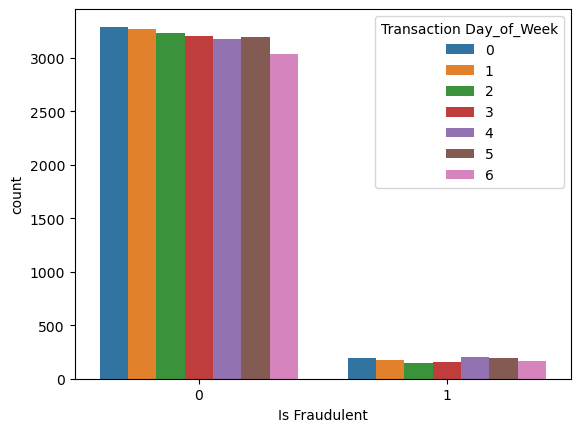

In [55]:
sns.countplot(data=df,x=df['Is Fraudulent'],hue=df['Transaction Day_of_Week'])

<Axes: xlabel='Is Fraudulent', ylabel='count'>

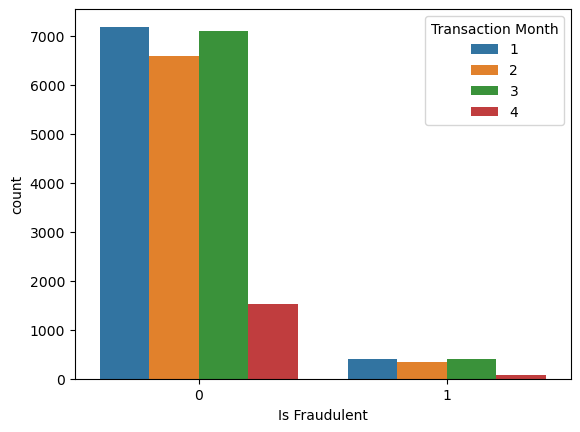

In [56]:
sns.countplot(data=df,x=df['Is Fraudulent'],hue=df['Transaction Month'])

<Axes: xlabel='Is Fraudulent', ylabel='count'>

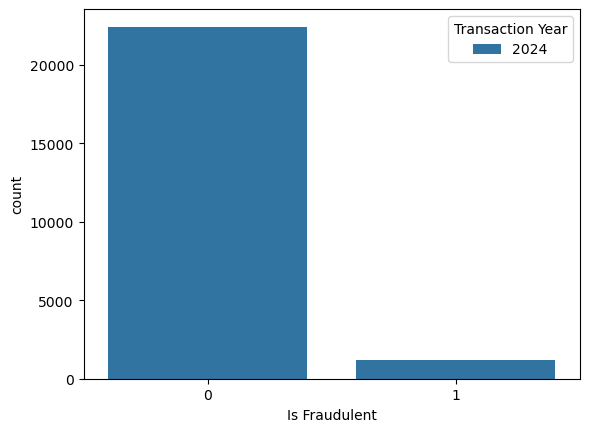

In [57]:
sns.countplot(data=df,x=df['Is Fraudulent'],hue=df['Transaction Year'])

In [58]:
df=df.drop('Transaction Date',axis=1)


In [59]:
df

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Month,Transaction Year,Transaction Day,Transaction Day_of_Week
0,42.32,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23,3,2024,24,6
1,301.34,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0,1,2024,22,0
2,340.32,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8,1,2024,22,0
3,95.77,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20,1,2024,16,1
4,77.45,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15,1,2024,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16,1,2024,26,4
23630,47.42,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17,2,2024,25,6
23631,1045.23,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23,3,2024,28,3
23632,34.25,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11,2,2024,9,4


In [60]:
df=df.drop(['IP Address','Shipping Address','Billing Address'],axis=1)


In [61]:
df

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Month,Transaction Year,Transaction Day,Transaction Day_of_Week
0,42.32,PayPal,electronics,1,40,East Jameshaven,desktop,0,282,23,3,2024,24,6
1,301.34,credit card,electronics,3,35,Kingstad,tablet,0,223,0,1,2024,22,0
2,340.32,debit card,toys & games,5,29,North Ryan,desktop,0,360,8,1,2024,22,0
3,95.77,credit card,electronics,5,45,Kaylaville,mobile,0,325,20,1,2024,16,1
4,77.45,credit card,clothing,5,42,North Edwardborough,desktop,0,116,15,1,2024,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,PayPal,toys & games,5,32,Rebeccafurt,tablet,0,363,16,1,2024,26,4
23630,47.42,credit card,clothing,4,41,Nataliefort,desktop,0,296,17,2,2024,25,6
23631,1045.23,bank transfer,health & beauty,1,9,East Shannonville,tablet,0,329,23,3,2024,28,3
23632,34.25,debit card,home & garden,2,39,Lake Nicole,mobile,0,347,11,2,2024,9,4


In [62]:
label_df=df.groupby(['Device Used','Is Fraudulent'])['Transaction Amount'].sum().index

In [63]:
val_df=df.groupby(['Device Used','Is Fraudulent'])['Transaction Amount'].sum().values

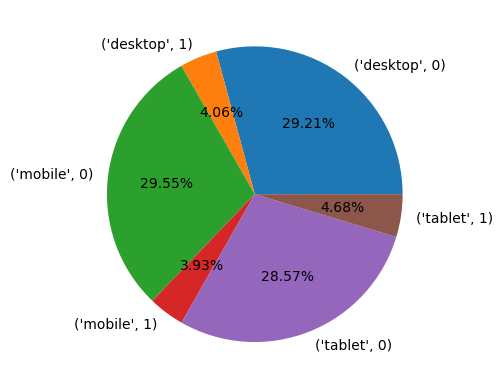

In [64]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [65]:
label_df=df.groupby(['Product Category','Is Fraudulent'])['Transaction Amount'].sum().index

In [66]:
val_df=df.groupby(['Product Category','Is Fraudulent'])['Transaction Amount'].sum().values

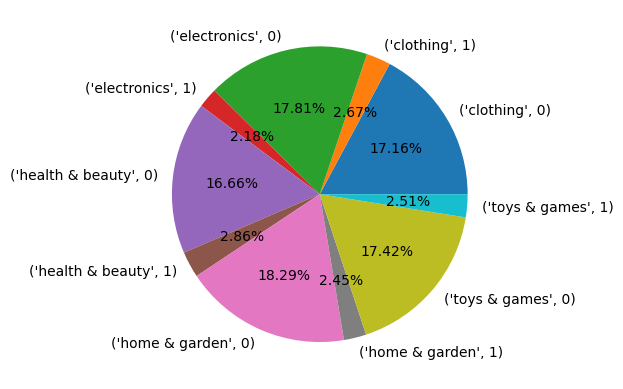

In [67]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [68]:
df

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Month,Transaction Year,Transaction Day,Transaction Day_of_Week
0,42.32,PayPal,electronics,1,40,East Jameshaven,desktop,0,282,23,3,2024,24,6
1,301.34,credit card,electronics,3,35,Kingstad,tablet,0,223,0,1,2024,22,0
2,340.32,debit card,toys & games,5,29,North Ryan,desktop,0,360,8,1,2024,22,0
3,95.77,credit card,electronics,5,45,Kaylaville,mobile,0,325,20,1,2024,16,1
4,77.45,credit card,clothing,5,42,North Edwardborough,desktop,0,116,15,1,2024,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,PayPal,toys & games,5,32,Rebeccafurt,tablet,0,363,16,1,2024,26,4
23630,47.42,credit card,clothing,4,41,Nataliefort,desktop,0,296,17,2,2024,25,6
23631,1045.23,bank transfer,health & beauty,1,9,East Shannonville,tablet,0,329,23,3,2024,28,3
23632,34.25,debit card,home & garden,2,39,Lake Nicole,mobile,0,347,11,2,2024,9,4


In [69]:
le=LabelEncoder()


In [70]:
df['Payment Method']=le.fit_transform(df['Payment Method'])


In [71]:
df['Product Category']=le.fit_transform(df['Product Category'])

In [72]:
df['Customer Location']=le.fit_transform(df['Customer Location'])

In [73]:
df['Device Used']=le.fit_transform(df['Device Used'])

In [74]:
df

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Month,Transaction Year,Transaction Day,Transaction Day_of_Week
0,42.32,0,1,1,40,2447,0,0,282,23,3,2024,24,6
1,301.34,2,1,3,35,5019,2,0,223,0,1,2024,22,0
2,340.32,3,4,5,29,9243,0,0,360,8,1,2024,22,0
3,95.77,2,1,5,45,4873,1,0,325,20,1,2024,16,1
4,77.45,2,0,5,42,8701,0,0,116,15,1,2024,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,0,4,5,32,10986,2,0,363,16,1,2024,26,4
23630,47.42,2,0,4,41,7171,0,0,296,17,2,2024,25,6
23631,1045.23,1,2,1,9,2964,2,0,329,23,3,2024,28,3
23632,34.25,3,3,2,39,5891,1,0,347,11,2,2024,9,4


In [75]:
df.describe()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Month,Transaction Year,Transaction Day,Transaction Day_of_Week
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.0,23634.000000,23634.000000
mean,229.367099,1.504697,2.004231,3.000550,34.560210,7455.016671,0.996065,0.051705,178.660531,11.266015,2.130532,2024.0,14.860878,2.960481
std,282.046669,1.119334,1.413968,1.419663,10.009471,4266.330576,0.816427,0.221436,107.388682,6.980659,0.944405,0.0,8.994172,1.996835
min,10.000000,0.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2024.0,1.000000,0.000000
25%,69.070000,1.000000,1.000000,2.000000,28.000000,3904.250000,0.000000,0.000000,84.000000,5.000000,1.000000,2024.0,7.000000,1.000000
50%,151.415000,2.000000,2.000000,3.000000,35.000000,7365.500000,1.000000,0.000000,178.000000,11.000000,2.000000,2024.0,15.000000,3.000000
75%,296.127500,3.000000,3.000000,4.000000,41.000000,11186.750000,2.000000,0.000000,272.000000,17.000000,3.000000,2024.0,23.000000,5.000000
max,9716.500000,3.000000,4.000000,5.000000,73.000000,14867.000000,2.000000,1.000000,365.000000,23.000000,4.000000,2024.0,31.000000,6.000000


C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Transaction Amount', ylabel='Count'>

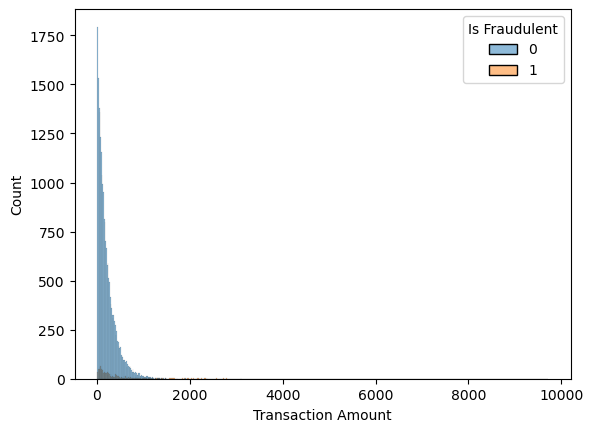

In [76]:
sns.histplot(x=df['Transaction Amount'],hue=df['Is Fraudulent'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Customer Age', ylabel='Count'>

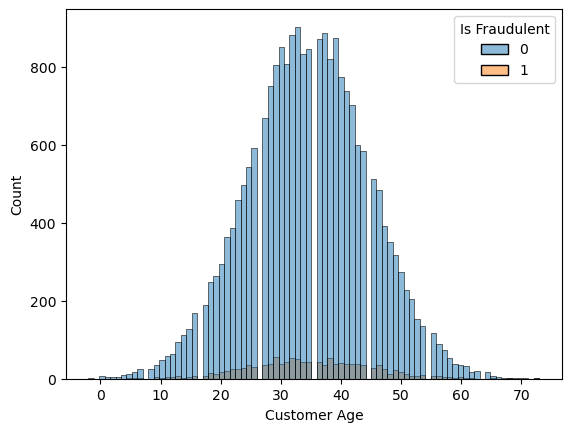

In [77]:
sns.histplot(x=df['Customer Age'],hue=df['Is Fraudulent'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Account Age Days', ylabel='Count'>

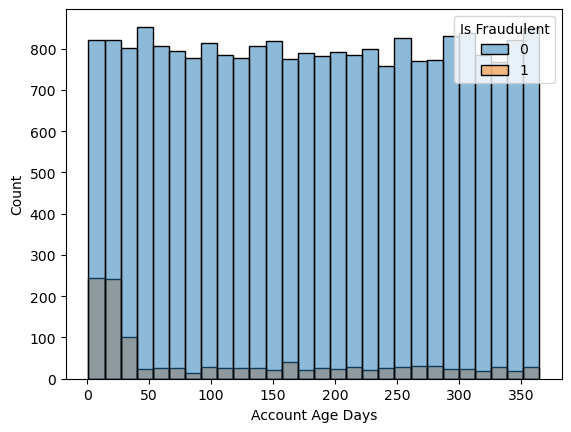

In [78]:
sns.histplot(x=df['Account Age Days'],hue=df['Is Fraudulent'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Transaction Hour', ylabel='Count'>

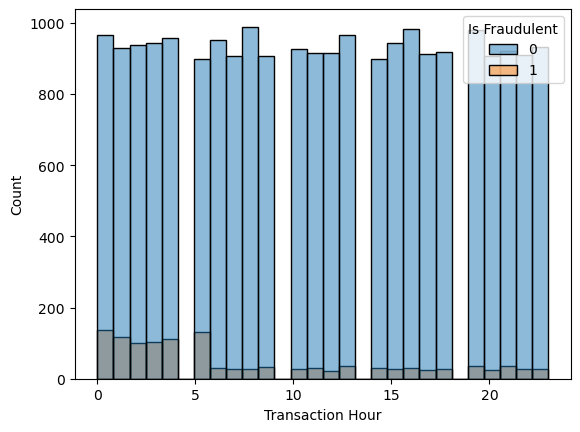

In [79]:
sns.histplot(data=df,x=df['Transaction Hour'],hue=df['Is Fraudulent'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Transaction Month', ylabel='Count'>

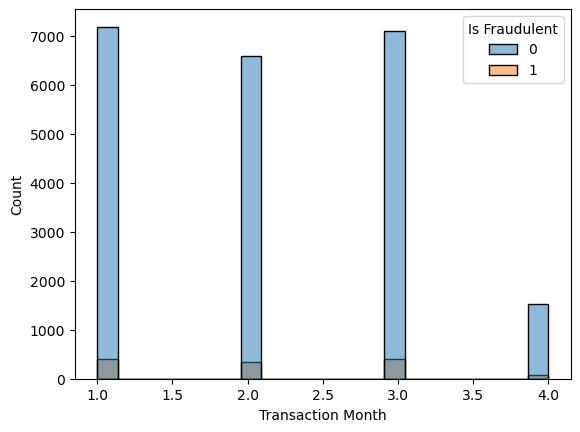

In [80]:
sns.histplot(data=df,x=df['Transaction Month'],hue=df['Is Fraudulent'])

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Transaction Day', ylabel='Count'>

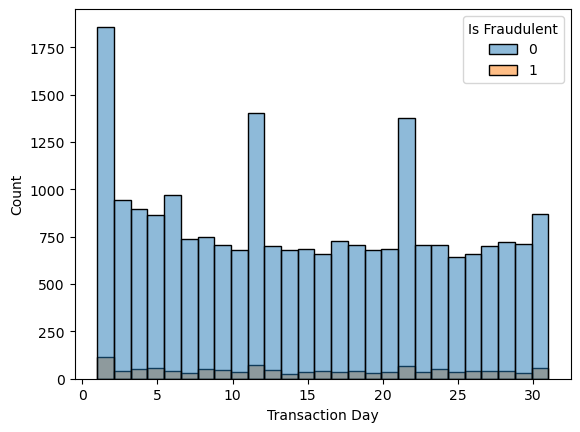

In [81]:
sns.histplot(data=df,x=df['Transaction Day'],hue=df['Is Fraudulent'])

In [82]:
df

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Month,Transaction Year,Transaction Day,Transaction Day_of_Week
0,42.32,0,1,1,40,2447,0,0,282,23,3,2024,24,6
1,301.34,2,1,3,35,5019,2,0,223,0,1,2024,22,0
2,340.32,3,4,5,29,9243,0,0,360,8,1,2024,22,0
3,95.77,2,1,5,45,4873,1,0,325,20,1,2024,16,1
4,77.45,2,0,5,42,8701,0,0,116,15,1,2024,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,0,4,5,32,10986,2,0,363,16,1,2024,26,4
23630,47.42,2,0,4,41,7171,0,0,296,17,2,2024,25,6
23631,1045.23,1,2,1,9,2964,2,0,329,23,3,2024,28,3
23632,34.25,3,3,2,39,5891,1,0,347,11,2,2024,9,4


In [83]:
X=df.drop('Is Fraudulent',axis=1)

In [84]:
X

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Account Age Days,Transaction Hour,Transaction Month,Transaction Year,Transaction Day,Transaction Day_of_Week
0,42.32,0,1,1,40,2447,0,282,23,3,2024,24,6
1,301.34,2,1,3,35,5019,2,223,0,1,2024,22,0
2,340.32,3,4,5,29,9243,0,360,8,1,2024,22,0
3,95.77,2,1,5,45,4873,1,325,20,1,2024,16,1
4,77.45,2,0,5,42,8701,0,116,15,1,2024,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,0,4,5,32,10986,2,363,16,1,2024,26,4
23630,47.42,2,0,4,41,7171,0,296,17,2,2024,25,6
23631,1045.23,1,2,1,9,2964,2,329,23,3,2024,28,3
23632,34.25,3,3,2,39,5891,1,347,11,2,2024,9,4


In [85]:
y=df['Is Fraudulent']

In [86]:
y

0        0
1        0
2        0
3        0
4        0
        ..
23629    0
23630    0
23631    0
23632    0
23633    0
Name: Is Fraudulent, Length: 23634, dtype: int64

In [87]:
y.value_counts()

Is Fraudulent
0    22412
1     1222
Name: count, dtype: int64

In [88]:
sm=SMOTE()

In [89]:
X,y=sm.fit_resample(X,y)


In [90]:
X

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,Account Age Days,Transaction Hour,Transaction Month,Transaction Year,Transaction Day,Transaction Day_of_Week
0,42.320000,0,1,1,40,2447,0,282,23,3,2024,24,6
1,301.340000,2,1,3,35,5019,2,223,0,1,2024,22,0
2,340.320000,3,4,5,29,9243,0,360,8,1,2024,22,0
3,95.770000,2,1,5,45,4873,1,325,20,1,2024,16,1
4,77.450000,2,0,5,42,8701,0,116,15,1,2024,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44819,593.972139,1,1,1,19,10653,0,214,4,1,2024,9,1
44820,378.781032,1,4,3,26,12891,1,12,3,1,2024,10,1
44821,64.525381,2,0,1,34,851,0,340,3,1,2024,20,2
44822,182.907866,0,0,1,31,6897,2,26,19,1,2024,23,3


In [91]:
y.value_counts()

Is Fraudulent
0    22412
1    22412
Name: count, dtype: int64

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
X_train.shape

(35859, 13)

In [94]:
y_train.shape

(35859,)

In [95]:
X_test.shape

(8965, 13)

In [96]:
y_test.shape

(8965,)

In [97]:
# Train the Isolation Forest model
outlier_detector = IsolationForest(contamination=0.05, random_state=42)
outlier_detector.fit(X_train)

IsolationForest(contamination=0.05, random_state=42)

In [98]:
outliers_train = outlier_detector.predict(X_train)


In [99]:
outliers_train

array([1, 1, 1, ..., 1, 1, 1])

In [100]:
# Remove outliers from the training data
X_train_cleaned = X_train[outliers_train == 1]
y_train_cleaned = y_train[outliers_train == 1]

In [101]:
X_train_cleaned.shape

(34066, 13)

In [102]:
y_train_cleaned.shape

(34066,)

In [103]:
model = RandomForestClassifier()
model.fit(X_train_cleaned, y_train_cleaned)

RandomForestClassifier()

In [104]:
y_pred=model.predict(X_test)


In [105]:
accuracy_score(y_test,y_pred)

0.9255995538204127

In [106]:
cm=confusion_matrix(y_test,y_pred)

In [107]:
cm

array([[4147,  408],
       [ 259, 4151]], dtype=int64)

<Axes: >

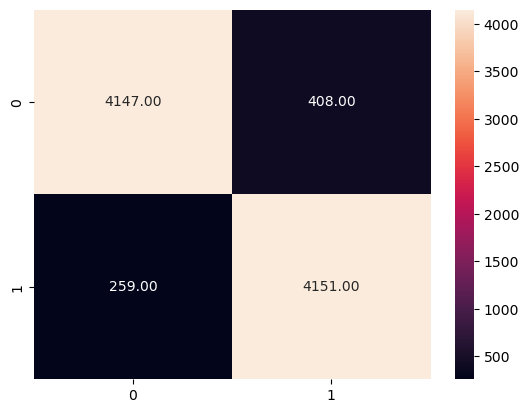

In [108]:
sns.heatmap(data=cm,fmt="1.2f",annot=True)

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4555
           1       0.91      0.94      0.93      4410

    accuracy                           0.93      8965
   macro avg       0.93      0.93      0.93      8965
weighted avg       0.93      0.93      0.93      8965

